<a href="https://colab.research.google.com/github/Heloisag/Ambientes_virtuais_unity_vila/blob/main/AC2_Classifica%C3%A7%C3%A3o_montando_modelos_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PARTE 2 - ALGORITIMO DE CLASSIFICAÇÃO
Este notebook descreve a atividade de classificação realizada pelo grupo para a AC2 da disciplina de Reconhecimento de Padrões.

#Membros do grupo

* Felipe Mastromauro Corrêa - RA 210186 - TIN2
* Gabriel Queiroz Pereira Yamaya - RA 212065 - TIN2
* Heloísa Goulart Vivencio - RA 222312 - TIN1
* João Vítor Massami Goya - RA 235598 - TIN2



---



# Dataset escolhido
O dataset escolhido para esta parte da AC2 foi o ME/CFS vs Depression Classification Dataset.

## Objetivo
Os modelos treinados a partir deste dataset devem ser capazes de classificar o quadro de uma pessoa em:

* 'Depression' (Depressão);
* 'ME/CFS' (encefalomielite miálgica/síndrome da fadiga crônica);
* 'Both' (Ambos).

## Explicação da colunas:

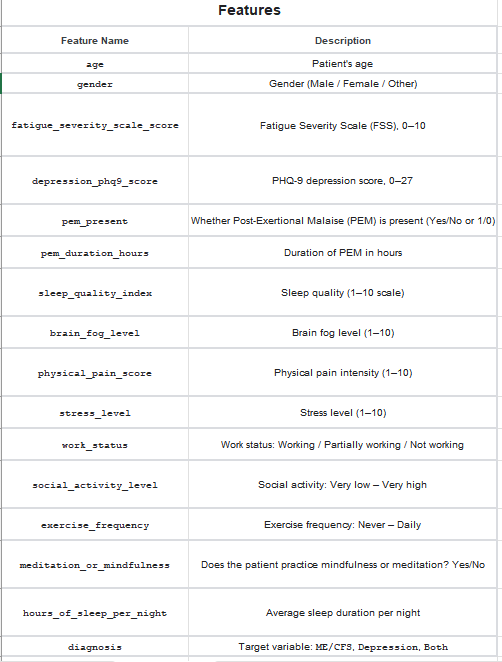
---



## Instalação de bibliotecas

Importação de bibliotecas e pacotes separadas em:

*As bibliotecas escolhidas visão cuidar dos dados e graficos do nosso projeto*

- Pré processamento
- Modelos
- Avaliações

In [ ]:
! pip install pandas scikit-learn matplotlib seaborn imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --- Pré-processamento ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# --- Modelos Scikit-learn ---
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier

# --- Tensorflow ---

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers

# --- Avaliação ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.pipeline import Pipeline

# Obtenção do dataset

In [ ]:
dataset: pd.DataFrame = pd.read_csv('/content/me_cfs_vs_depression_dataset.csv')

# Análise exploratória dos dados

Exibição do data set escolhido com os dados brutos (sem limpeza de informações nulas) para comparações entre colunas e identificação de pontos importantes do dataset



Visualização de amostra do início do dataset para verificação de natureza dos dados.

In [ ]:
dataset.head(10)


,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both
5,25,Female,3.5,3.9,6.4,6.5,9.0,7.5,41.0,4.1,1,Partially working,Medium,Never,No,ME/CFS
6,38,Female,3.3,10.0,4.3,6.2,15.0,7.0,29.0,9.9,1,Not working,Very low,Sometimes,Yes,Both
7,56,Male,1.0,9.8,4.0,3.3,10.0,4.5,31.0,3.5,0,Not working,Very high,Daily,Yes,Depression
8,36,Female,7.3,6.9,9.0,7.8,9.0,7.0,31.0,7.8,1,Working,High,NaN,No,ME/CFS
9,40,Female,1.4,2.2,4.4,1.7,9.0,9.8,41.0,4.2,1,Partially working,Medium,Rarely,Yes,ME/CFS


## Visualização de colunas, tipos de dados e contagem de valores não nulos do dataset

In [ ]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

## Visualização da quantidade de valores únicos das features nominais do dataset

In [ ]:
for col in dataset.select_dtypes(exclude=np.number).columns:
    print(f"\nColuna {col}: {dataset[col].nunique()} valores únicos")


Coluna gender: 2 valores únicos

Coluna work_status: 3 valores únicos

Coluna social_activity_level: 5 valores únicos

Coluna exercise_frequency: 5 valores únicos

Coluna meditation_or_mindfulness: 2 valores únicos

Coluna diagnosis: 3 valores únicos


## Contagem de valores faltantes (NaN)

In [ ]:
dataset.isnull().sum()

,0
age,0
gender,0
sleep_quality_index,47
brain_fog_level,48
physical_pain_score,34
stress_level,48
depression_phq9_score,22
fatigue_severity_scale_score,21
pem_duration_hours,24
hours_of_sleep_per_night,21


## Gráfico de quantidade de valores nulos antes do pré-processamento

Contagem de Dados Faltantes NaN antes do pré-processamento:

brain_fog_level                 48
stress_level                    48
sleep_quality_index             47
work_status                     47
social_activity_level           40
exercise_frequency              39
physical_pain_score             34
pem_duration_hours              24
depression_phq9_score           22
fatigue_severity_scale_score    21
hours_of_sleep_per_night        21
meditation_or_mindfulness       11
dtype: int64


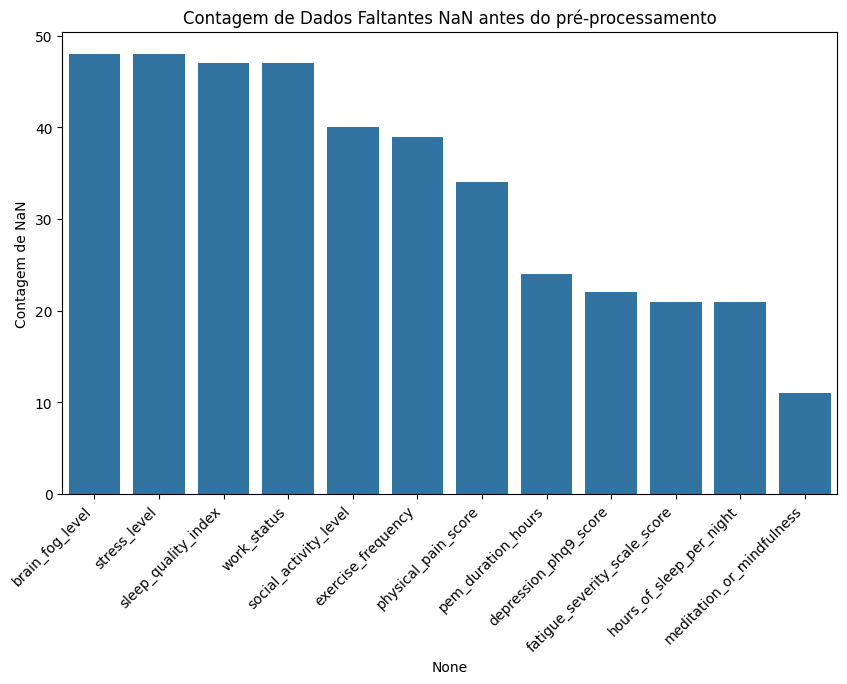

In [ ]:
print("Contagem de Dados Faltantes NaN antes do pré-processamento:\n")
nulos_antes = dataset.isnull().sum()
nulos_antes = nulos_antes[nulos_antes > 0].sort_values(ascending=False)
print(nulos_antes)

plt.figure(figsize=(10, 6))
sns.barplot(x=nulos_antes.index, y=nulos_antes.values)
plt.title('Contagem de Dados Faltantes NaN antes do pré-processamento')
plt.ylabel('Contagem de NaN')
plt.xticks(rotation=45, ha='right')
plt.show()

## Mapa de valores nulos

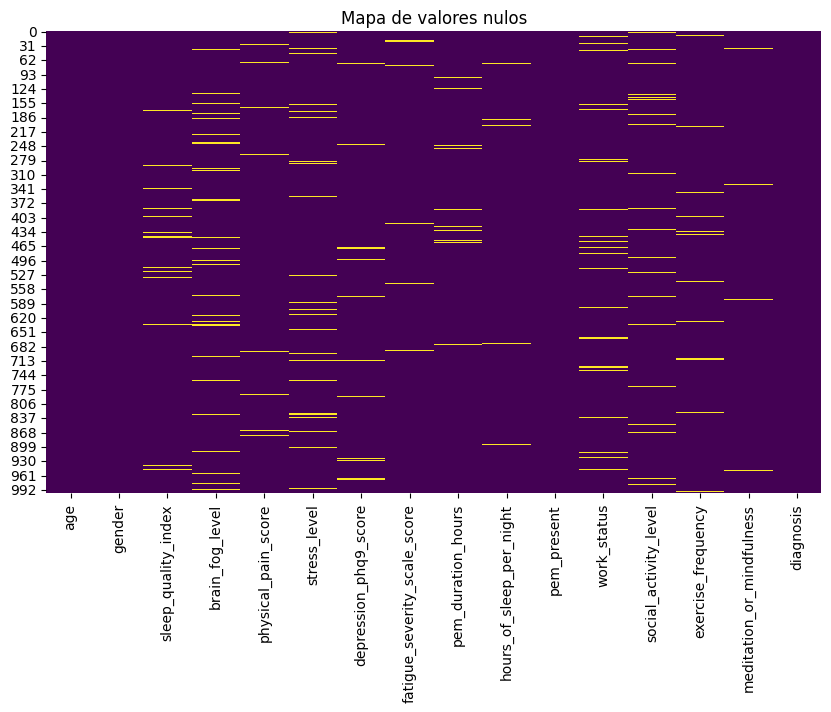

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores nulos")
plt.show()

## Gráfico dos diagnósticos (classe alvo)

In [ ]:
print(dataset['diagnosis'].value_counts())

diagnosis
Depression    401
ME/CFS        397
Both          202
Name: count, dtype: int64


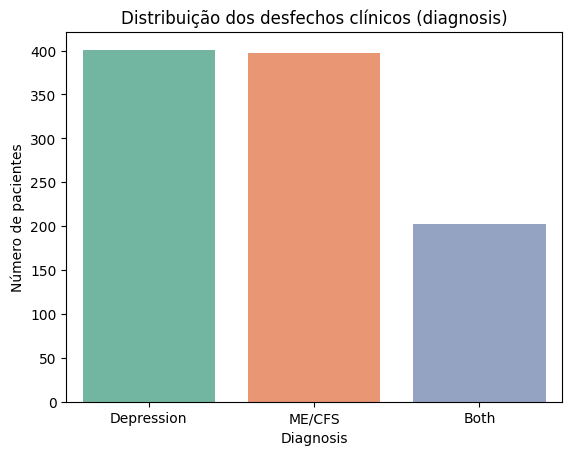

In [ ]:
sns.countplot(x='diagnosis', data=dataset, palette='Set2',
              order=dataset['diagnosis'].value_counts().index)
plt.title('Distribuição dos desfechos clínicos (diagnosis)')
plt.xlabel('Diagnosis')
plt.ylabel('Número de pacientes')
plt.show()

Concluimos com a ajuda grafica que o dataset é desbalanceado. 'Both' é a classe minoritária.
Portanto usaremos SMOTE dentro do pré processamento de dados para corrigir isso.

*SMOTE* -> Técnica de Superamostragem Sintética da Minoria

## Matriz de correlação

Usamos o mapa a seguir para encontrar visualmente quais variáveis são boas candidatas a preditoras (as que têm correlação forte, positiva ou negativa) e também para verificar se temos variáveis redundantes (duas variáveis que medem quase a mesma coisa, com correlação perto de 1 ou -1).

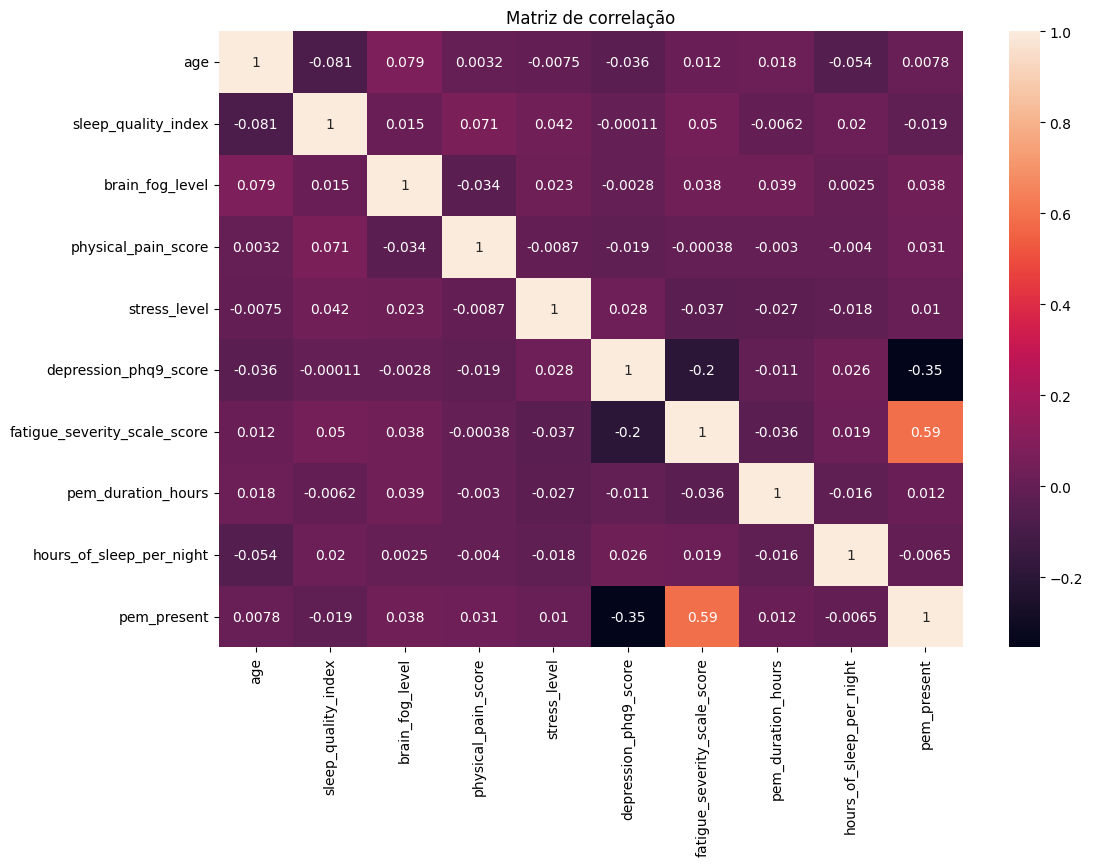

In [ ]:
num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_correlation = dataset[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_correlation, annot=True,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Matriz de correlação')
plt.show()

Como as correlações mais distantes de 0 são `-0.35` e `0.59`, não é possível concluir a necessidade da remoção de alguma coluna.

## Pairplot

Este código gera um pairplot para visualizar as relações entre idade, níveis de stress, depressão, fadiga e diagnóstico. Os pontos no gráfico são coloridos pelo diagnóstico, permitindo analisar como essas características se distribuem e se relacionam entre os grupos 'Depression', 'ME/CFS' e 'Both'. Ideal para identificar padrões visuais e a separabilidade das classes.

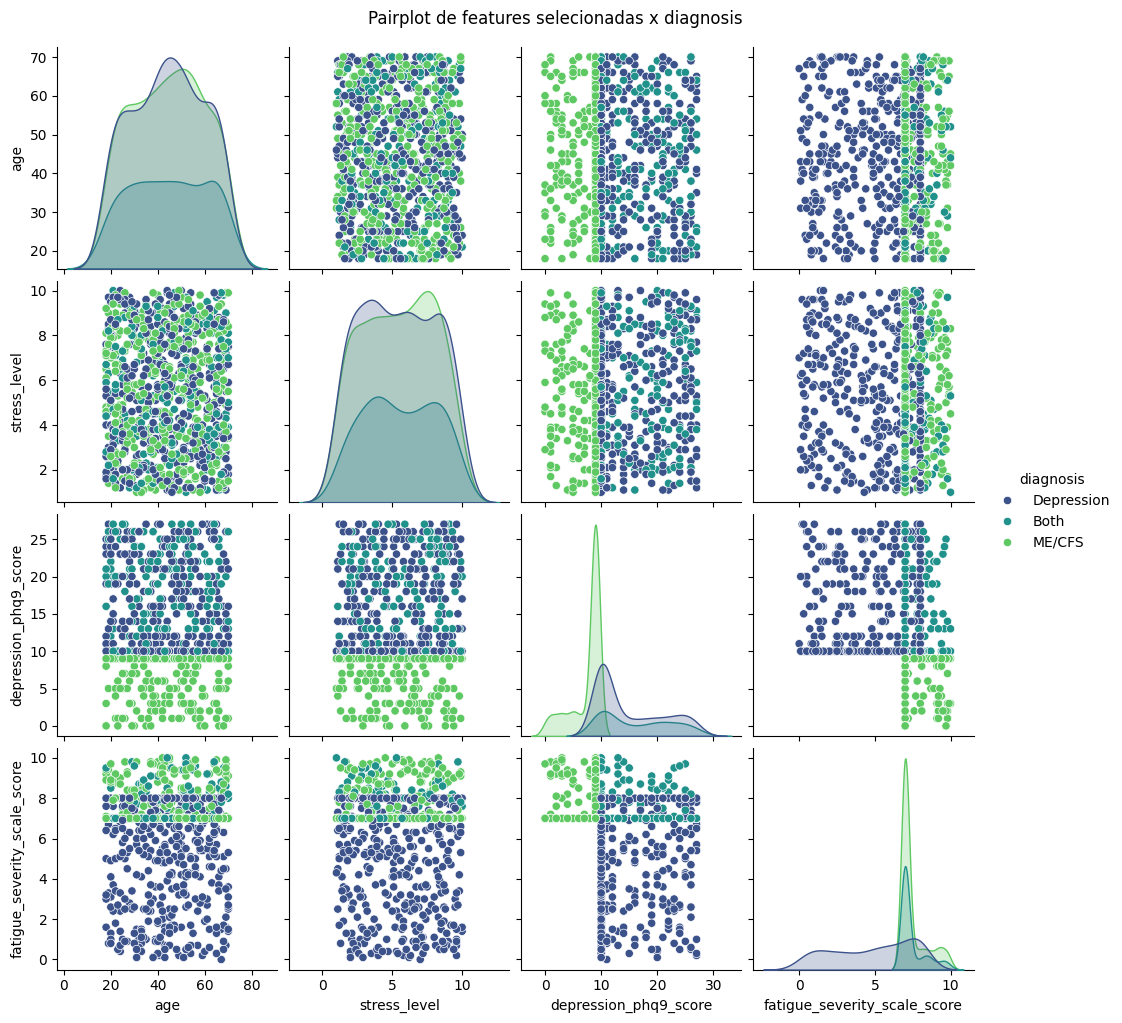

In [ ]:

pairplot_cols = ['age', 'stress_level', 'depression_phq9_score',
                 'fatigue_severity_scale_score', 'diagnosis']
pairplot_df = dataset[pairplot_cols]

if pairplot_df['diagnosis'].dtype != 'object':
     try:
         pass
     except NameError:
         print("Could not decode diagnosis labels for pairplot.")
         pass

sns.pairplot(pairplot_df, hue='diagnosis', palette='viridis')
plt.suptitle('Pairplot de features selecionadas x diagnosis', y=1.02) # Adjust title position
plt.show()


### Discussão do pairplot

O gráfico apresentado mostra o quão interessantes são as features `depression_phq9_score` e `fatigue_severity_scale_score` para a previsão das classes finais. O 'cisma' entre os dados nos gráficos que possuem essas features é bastante visível, dada a natureza dos dados (`depression_phq9_score` > 10 significa um paciente deprimido; `fatigue_severity_scale_score` > 6 normalmente signfica um paciente com ME/CFS, enquanto valores > 8 garantem esse diagnóstico).

Os outros valores apresentados no dataset não mostram relação clara, nem mostram indícios imediatos da influência que fazem no resultado. Portanto, não há como justificar a remoção de nenhuma feature do dataset.

## Boxplot geral das features

Este código gera um boxplot (diagrama de caixa) geral das features em relação a si mesmas, de modo a identificar outliers locais e a distribuição dos valores numéricos.

<Axes: >

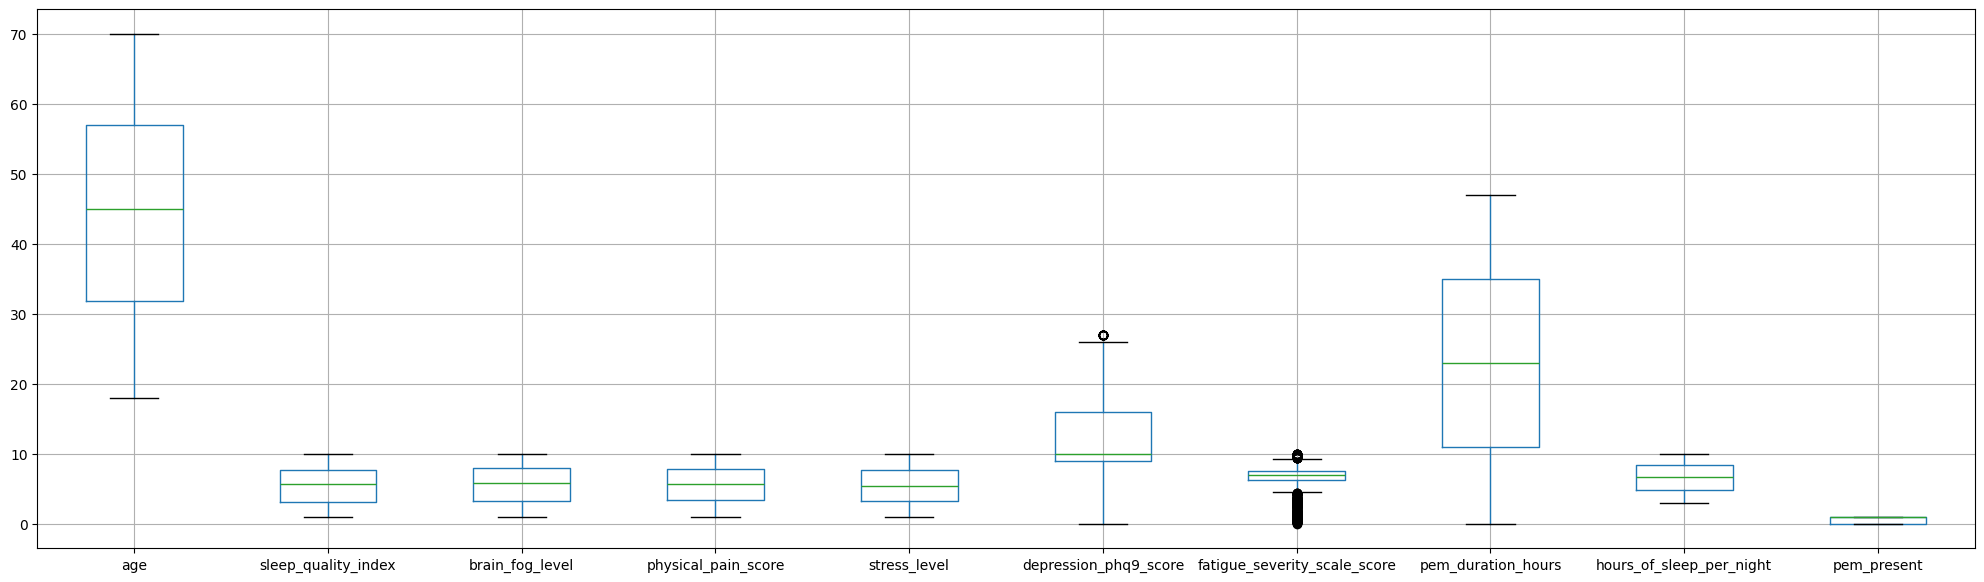

In [ ]:
dataset.boxplot(figsize=(25, 7))

## Boxplots de features x diagnosis

Este código cria uma grade de seis boxplots, um para cada feature na lista `cols_to_plot` para verificar o comportamento das distribuições de cada feature entre os três grupos de `diagnosis` (Depression, Both, ME/CFS).


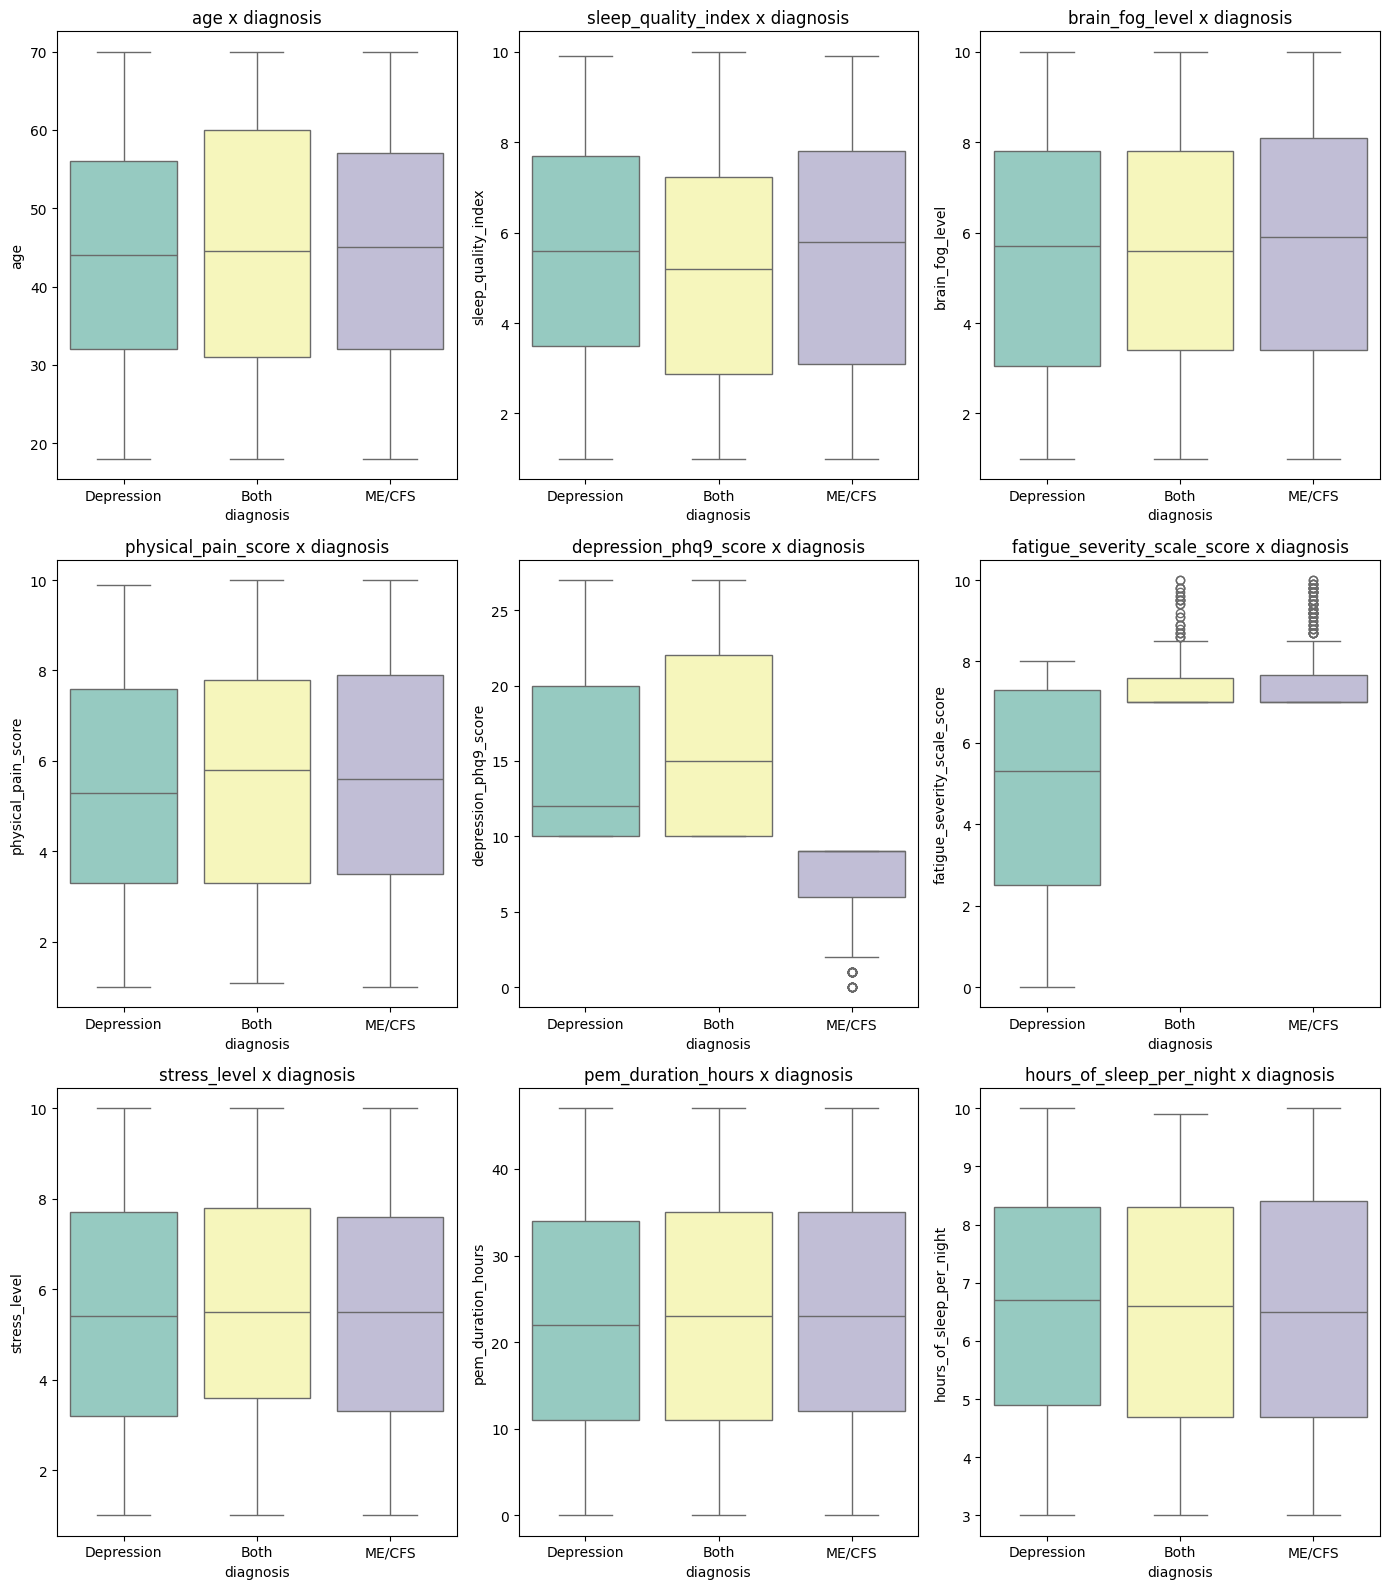

In [ ]:
cols_to_plot = ['age', 'sleep_quality_index', 'brain_fog_level',
                'physical_pain_score', 'depression_phq9_score',
                'fatigue_severity_scale_score', 'stress_level',
                'pem_duration_hours', 'hours_of_sleep_per_night']
plt.figure(figsize=(14,16))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='diagnosis', y=col, data=dataset, palette='Set3')
    plt.title(f'{col} x diagnosis')
plt.tight_layout()
plt.show()

### Sobre os boxplots e outliers

Os boxplots gerais mostram uma presença grande de outliers na feature `fatigue_severity_scale_score`, que é uma ótima preditora. Simplesmente truncar o valor e substituí-lo pela média poderá enviesar o modelo de modo a diminuir a acurácia para as classes 'ME/CFS' e 'Both'.

O gráfico de `depression_phq9_score` também contém alguns poucos outliers representando pessoas com 'ME/CFS' que pontuaram pouco no score de depressão. Dada a pequena quantidade e a relevância desta feature, estes pontos podem ou não ser truncados para a média para melhor representação.

## Gráficos de distribuição de features numéricas x fatigue_severity_scale_score

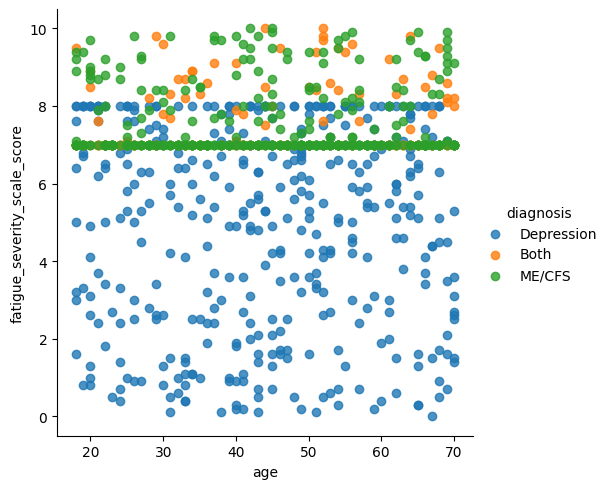

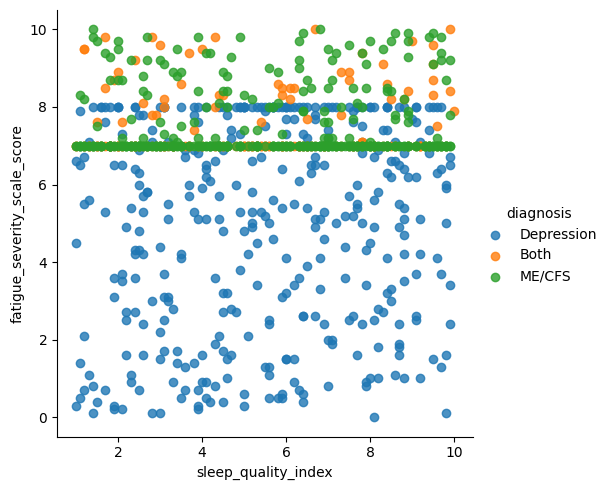

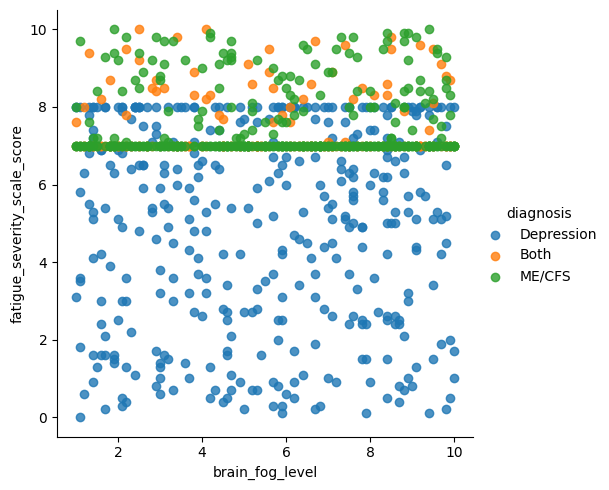

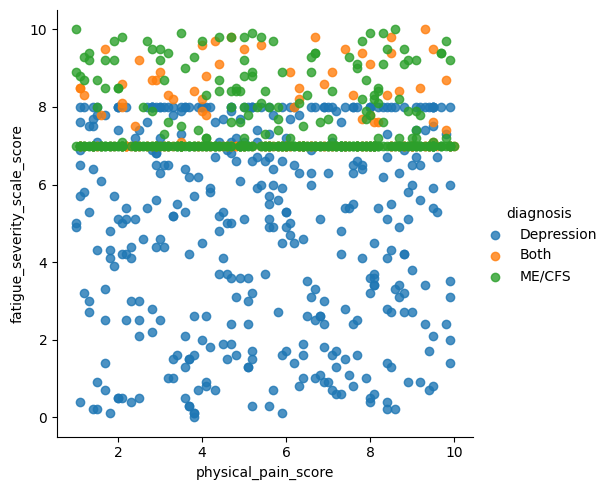

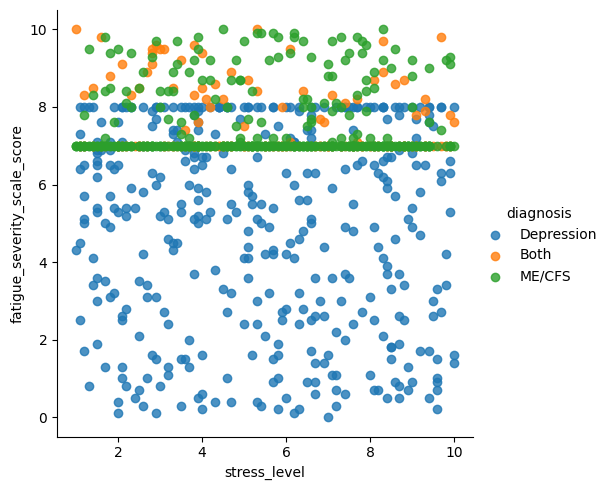

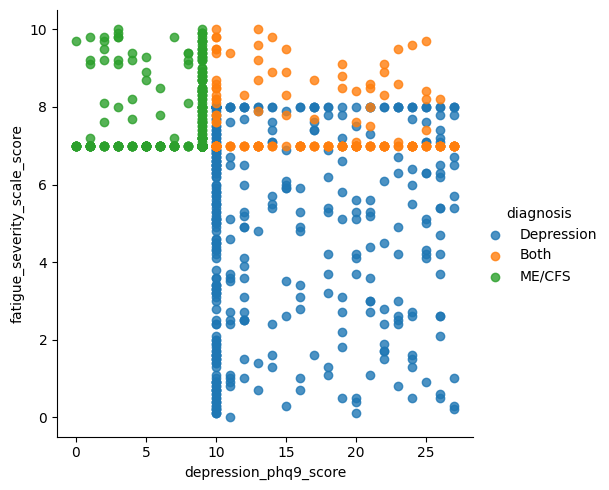

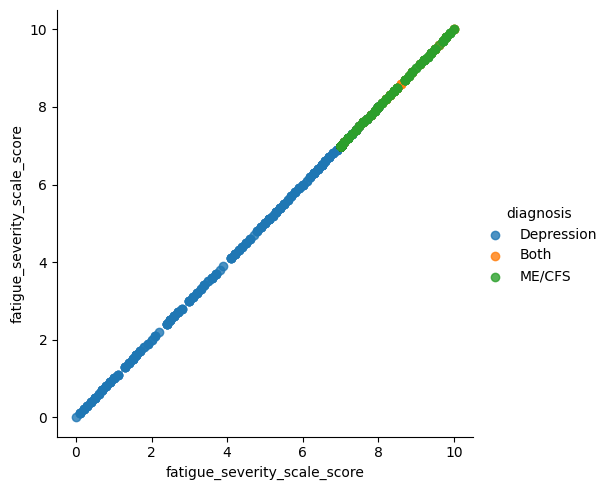

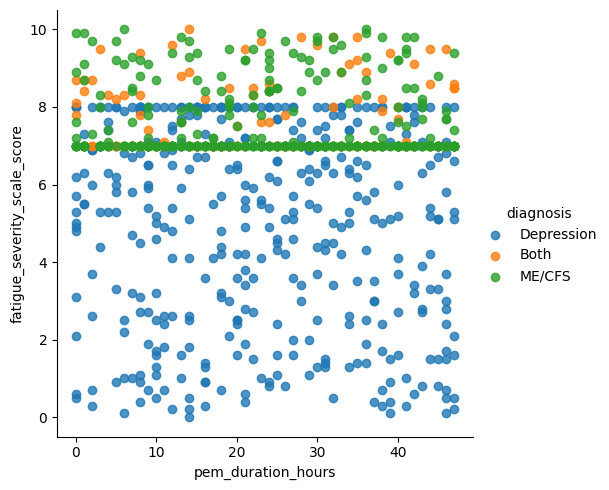

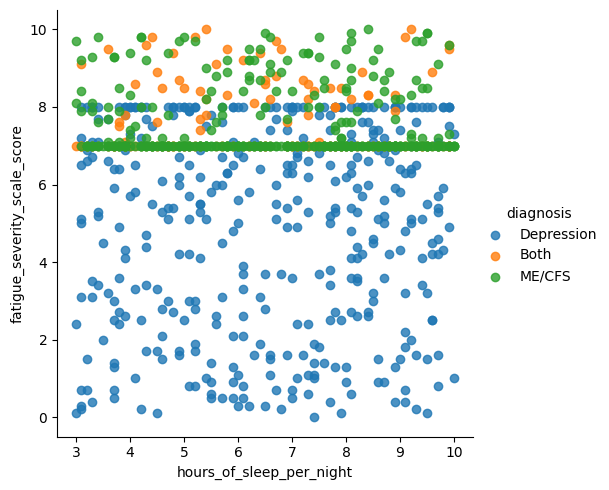

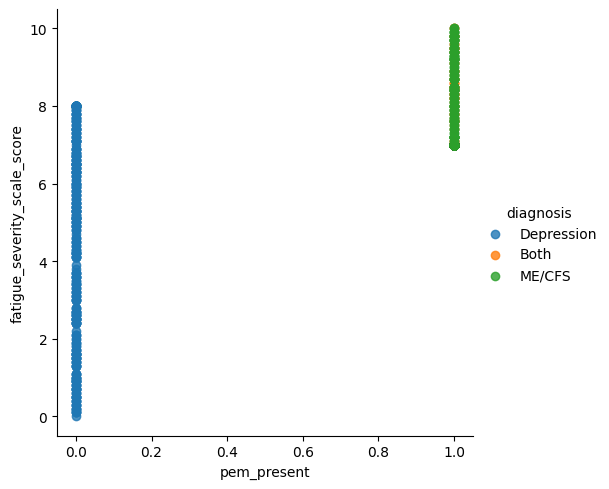

In [ ]:
for col in num_cols:
  sns.lmplot(dataset, x=col, y='fatigue_severity_scale_score',
            hue='diagnosis', fit_reg=False)
  plt.show()

Os gráficos mostram, além das relações similares entre `fatigue_severity_scale_score` e outras features, a característica dos dados das classes 'ME/CFS' e 'Both': Os dados marcados como outliers fazem somente parte dessas classes, e como o intuito do modelo é acuradamente classificar entre 'Depression' e as classes em questão, truncar os outliers desfiguraria a feature completamente.

## Resumo da análise exploratória

In [ ]:
print("Resumo:")
print(f"Total de linhas: {dataset.shape[0]}")
print(f"Total de colunas: {dataset.shape[1]}")
print(f"Variáveis numéricas: {len(num_cols)}")
cat_cols = dataset.select_dtypes(include='object').columns.tolist()
print(f"Variáveis categóricas: {len(cat_cols)}")

print("\nDistribuição do Status:")
print(dataset['diagnosis'].value_counts(normalize=True).round(2))

print("\nColunas com mais de 20% de valores ausentes:")
missing = dataset.isnull().mean().sort_values(ascending=False)
display(missing[missing > 0.2])

Resumo:
Total de linhas: 1000
Total de colunas: 16
Variáveis numéricas: 10
Variáveis categóricas: 6

Distribuição do Status:
diagnosis
Depression    0.4
ME/CFS        0.4
Both          0.2
Name: proportion, dtype: float64

Colunas com mais de 20% de valores ausentes:


,0



# Pré-processamento



## Imputação de valores nulos

Este código limpa o DataFrame dataset preenchendo valores ausentes (NaN) dentificando automaticamente colunas numéricas (int/float) e categóricas (object).

Para cada coluna numérica com dados faltantes, ele calcula a Mediana (o valor central, que é menos sensível a outliers) e a usa para preencher os buracos.

Para cada coluna de texto (categórica) com dados faltantes, ele encontra a Moda (o valor mais comum) e a utiliza para preenchimento.

Ao final, ele exibe a contagem de nulos para verificar se todas as colunas foram limpas com sucesso.

In [ ]:
#Inicia a limpeza:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

for col in numeric_cols:
    if dataset[col].isnull().sum() > 0:
        median_value = dataset[col].median()
        dataset[col].fillna(median_value, inplace=True)
        print(f"Coluna numérica '{col}' preenchida com a mediana ({median_value}).")

for col in categorical_cols:
     if dataset[col].isnull().sum() > 0:
        mode_value = dataset[col].mode()[0]
        dataset[col].fillna(mode_value, inplace=True)
        print(f"Coluna categórica '{col}' preenchida com a moda ('{mode_value}').")

print("\nLimpeza de NaNs concluída.")



Coluna numérica 'sleep_quality_index' preenchida com a mediana (5.6).
Coluna numérica 'brain_fog_level' preenchida com a mediana (5.8).
Coluna numérica 'physical_pain_score' preenchida com a mediana (5.6).
Coluna numérica 'stress_level' preenchida com a mediana (5.4).
Coluna numérica 'depression_phq9_score' preenchida com a mediana (10.0).
Coluna numérica 'fatigue_severity_scale_score' preenchida com a mediana (7.0).
Coluna numérica 'pem_duration_hours' preenchida com a mediana (23.0).
Coluna numérica 'hours_of_sleep_per_night' preenchida com a mediana (6.6).
Coluna categórica 'work_status' preenchida com a moda ('Partially working').
Coluna categórica 'social_activity_level' preenchida com a moda ('Very low').
Coluna categórica 'exercise_frequency' preenchida com a moda ('Rarely').
Coluna categórica 'meditation_or_mindfulness' preenchida com a moda ('Yes').

Limpeza de NaNs concluída.


Contagem de Dados Faltantes NaN após a limpeza:

Series([], dtype: int64)


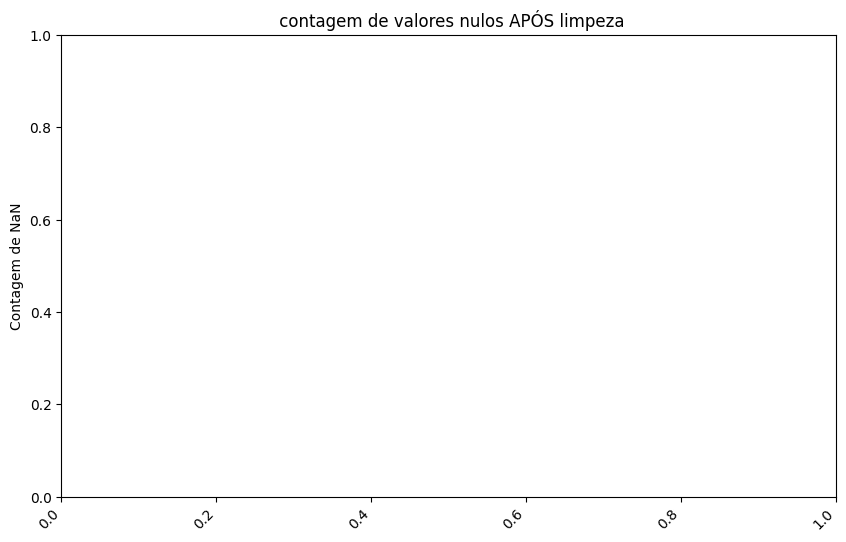

In [ ]:
print("Contagem de Dados Faltantes NaN após a limpeza:\n")
nulos_antes = dataset.isnull().sum()
nulos_antes = nulos_antes[nulos_antes > 0].sort_values(ascending=False)
print(nulos_antes)

plt.figure(figsize=(10, 6))
sns.barplot(x=nulos_antes.index, y=nulos_antes.values)
plt.title(' contagem de valores nulos APÓS limpeza')
plt.ylabel('Contagem de NaN')
plt.xticks(rotation=45, ha='right')
plt.show()

### Valor de K para KNN

In [ ]:
head_sample = dataset[:100].values
tail_sample = dataset[900:].values

train_sample = head_sample[0, :15]
test_sample = tail_sample[0, :15]

## Pipeline de pré-processamento


In [ ]:
TARGET_COL = 'diagnosis'

# Colunas pelo tipo de dado
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()
categorical_cols = dataset.select_dtypes(include='object').columns.tolist()
categorical_cols.remove(TARGET_COL) # Remove o alvo da lista de features


ordinal_cols = ['exercise_frequency', 'sleep_quality_index', 'diet_quality_index', 'stress_level']
ordinal_cols = [col for col in ordinal_cols if col in categorical_cols]

nominal_cols = [col for col in categorical_cols if col not in ordinal_cols]

print(f"Features Numéricas ({len(numeric_cols)}): {numeric_cols[:3]}...")
print(f"Features Ordinais ({len(ordinal_cols)}): {ordinal_cols}")
print(f"Features Nominais ({len(nominal_cols)}): {nominal_cols}")

# Pipelines de Transformação

# Pipeline para dados NUMÉRICOS:
# Preenche valores faltantes (NaN) com a mediana e normaliza os dados (StandardScaler) (Knn e Redes Neurais)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para dados CATEGÓRICOS ORDINAIS:
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Pipeline para dados CATEGÓRICOS NOMINAIS
# Preenche valores faltantes (NaN) com a moda e Converte para One-Hot Encoding Gênero = gender_Male, gender_Female
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols)
    ],
    remainder='passthrough'
)

print("\nPré-processador bem sucedido.")

Features Numéricas (10): ['age', 'sleep_quality_index', 'brain_fog_level']...
Features Ordinais (1): ['exercise_frequency']
Features Nominais (4): ['gender', 'work_status', 'social_activity_level', 'meditation_or_mindfulness']

Pré-processador bem sucedido.


## Aplicação da pipeline e SMOTE para escalonamento dos dados de treinamento

In [ ]:

# Features (X) e Alvo (y)
X = dataset.drop(TARGET_COL, axis=1)
y = dataset[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dados divididos: {X_train.shape} para treino, {X_test.shape} para teste.")

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Dados pré-processados (Imputados, Normalizados, Codificados).")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print(f"Dados de treino balanceados com SMOTE. Novo formato: {X_train_resampled.shape}")
print("\nDistribuição de classes no Treino (Pós-SMOTE):")
print(pd.Series(y_train_resampled).value_counts())

Dados divididos: (700, 15) para treino, (300, 15) para teste.
Dados pré-processados (Imputados, Normalizados, Codificados).
Dados de treino balanceados com SMOTE. Novo formato: (843, 23)

Distribuição de classes no Treino (Pós-SMOTE):
diagnosis
ME/CFS        281
Depression    281
Both          281
Name: count, dtype: int64


## Treinamento de modelos Scikit-learn

In [ ]:
# Treinamento e Avaliação

# Lista tabela final
model_results = {}
model_predictions = {}


print("--- 1. K-Nearest Neighbors (KNN) ---")
knn = KNeighborsClassifier(n_neighbors=7) #começo do treino
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test_processed)
model_results['KNN'] = classification_report(y_test, y_pred_knn, output_dict=True)
model_predictions['KNN'] = y_pred_knn
print(classification_report(y_test, y_pred_knn))

print("--- 2. Gaussian Naive Bayes ---")
gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)
y_pred_gnb = gnb.predict(X_test_processed)
model_results['Naive Bayes'] = classification_report(y_test, y_pred_gnb, output_dict=True)
model_predictions['Naive Bayes'] = y_pred_gnb
print(classification_report(y_test, y_pred_gnb))


print("--- 3. Árvore de Decisão ---")
dt = DecisionTreeClassifier(random_state=42, max_depth=10) # max_depth/overfitting
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test_processed)
model_results['Árvore de Decisão'] = classification_report(y_test, y_pred_dt, output_dict=True)
model_predictions['Árvore de Decisão'] = y_pred_dt
print(classification_report(y_test, y_pred_dt))

--- 1. K-Nearest Neighbors (KNN) ---
              precision    recall  f1-score   support

        Both       0.51      0.67      0.58        61
  Depression       1.00      0.95      0.97       120
      ME/CFS       0.81      0.72      0.76       119

    accuracy                           0.80       300
   macro avg       0.77      0.78      0.77       300
weighted avg       0.83      0.80      0.81       300

--- 2. Gaussian Naive Bayes ---
              precision    recall  f1-score   support

        Both       0.82      0.66      0.73        61
  Depression       1.00      1.00      1.00       120
      ME/CFS       0.84      0.92      0.88       119

    accuracy                           0.90       300
   macro avg       0.89      0.86      0.87       300
weighted avg       0.90      0.90      0.90       300

--- 3. Árvore de Decisão ---
              precision    recall  f1-score   support

        Both       0.95      0.92      0.93        61
  Depression       1.00      1.

## Treinamento de modelos Tensorflow

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)


def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

In [ ]:
! pip install np_utils

array([1, 0, 1, 1, 0])

Dados divididos: (700, 15) para treino, (300, 15) para teste.
Dados pré-processados (Imputados, Normalizados, Codificados).
Dados de treino balanceados com SMOTE. Novo formato: (843, 23)

Distribuição de classes no Treino (Pós-SMOTE):
2    281
1    281
0    281
Name: count, dtype: int64
--- 4. Regressão logística ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (843, 23)              │            47 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47 (192.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 47 (192.00 B)

None

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4106 - loss: 0.2805 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 0.8842 - val_precision: 0.1361 - val_recall: 1.0000
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4106 - loss: 0.0735 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 0.9916 - val_precision: 0.1361 - val_recall: 1.0000
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4106 - loss: -0.1005 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 1.1045 - val_precision: 0.1361 - val_recall: 1.0000
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4106 - loss: -0.2596 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 1.2230 - val_precision: 0.1361 - val_recall: 1.0000
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4106 - loss: -0.4082 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 1.3

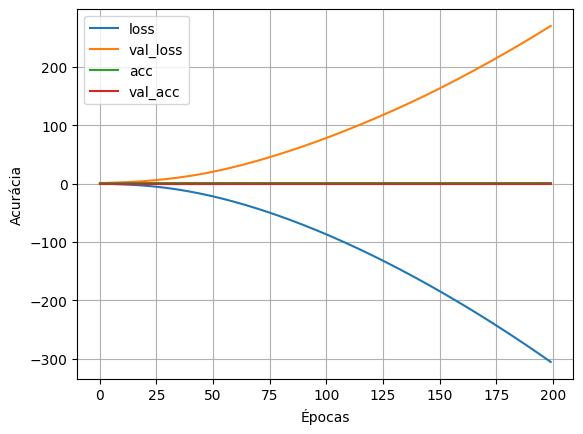

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

np.random.seed(1)
tf.random.set_seed(1)

# Features (X) e Alvo (y)
X = dataset.drop(TARGET_COL, axis=1)
y = dataset[TARGET_COL]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
display(y_encoded[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y_encoded)

print(f"Dados divididos: {X_train.shape} para treino, {X_test.shape} para teste.")

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Dados pré-processados (Imputados, Normalizados, Codificados).")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print(f"Dados de treino balanceados com SMOTE. Novo formato: {X_train_resampled.shape}")
print("\nDistribuição de classes no Treino (Pós-SMOTE):")
print(pd.Series(y_train_resampled).value_counts())

print("--- 4. Regressão logística ---")
normalizer = layers.Normalization()
normalizer.adapt(X_train_resampled)

lr = keras.Sequential([
  normalizer,
  keras.layers.Dense(15, activation='relu'),
  keras.layers.Dense(1, activation='softmax')
])
lr.compile(optimizer='adam', loss='binary_crossentropy',
           metrics=['accuracy', 'precision', 'recall'])
display(lr.summary())

lr_history = lr.fit(
    X_train_resampled, y_train_resampled,
    epochs=200,
    validation_split = 0.2,
    verbose=1
)

plot_loss(lr_history)
plot_acc(lr_history)
y_pred_lr = lr.predict(X_test_processed)

--- 5. Rede neural classificadora ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (843, 23)              │            47 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47 (192.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 47 (192.00 B)

None

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4106 - loss: 0.5349 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 0.8602 - val_precision: 0.1361 - val_recall: 1.0000
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4106 - loss: 0.3081 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 1.0357 - val_precision: 0.1361 - val_recall: 1.0000
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4106 - loss: 0.0834 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 1.2700 - val_precision: 0.1361 - val_recall: 1.0000
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4106 - loss: -0.1238 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 1.5275 - val_precision: 0.1361 - val_recall: 1.0000
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4106 - loss: -0.2886 - precision: 0.8158 - recall: 1.0000 - val_accuracy: 0.0769 - val_loss: 1.76

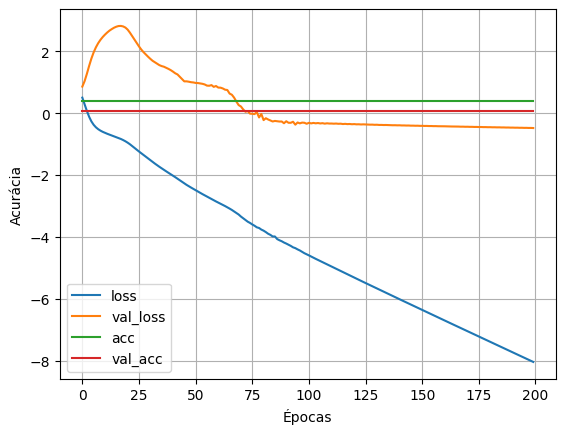

In [ ]:
print("--- 5. Rede neural classificadora ---")

normalizer = layers.Normalization()
normalizer.adapt(X_train_resampled)

nn = keras.Sequential([
  normalizer,
  keras.layers.Dense(3, activation='tanh'),
  keras.layers.Dense(17, activation='relu'),
  keras.layers.Dense(13, activation='relu'),
  keras.layers.Dense(3, activation='tanh'),
  keras.layers.Dense(1, activation='softmax')
])
nn.compile(optimizer='adam', loss='binary_crossentropy',
           metrics=['accuracy', 'precision', 'recall'])
display(nn.summary())

nn_history = nn.fit(
    X_train_resampled, y_train_resampled,
    epochs=200,
    validation_split = 0.2,
    verbose=1
)

plot_loss(nn_history)
plot_acc(nn_history)
y_pred_nn = lr.predict(X_test_processed)

# SLIDE

In [ ]:
# Tabela Comparativa de Resultados (Para o Slide)

results_list = []
for model_name, report in model_results.items():
    f1_macro = report['macro avg']['f1-score']
    accuracy = report['accuracy']
    results_list.append({
        'Modelo': model_name,
        'Acurácia': accuracy,
        'F1-Score (Macro Avg)': f1_macro
    })

results_df = pd.DataFrame(results_list).sort_values(by='F1-Score (Macro Avg)', ascending=False)

print("--- Tabela Comparativa de Resultados (Foco no F1-Macro) ---")
display(results_df.round(3))